In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import os

In [3]:

# Sample data
data = {
    'Date': pd.date_range(start='2024-02-01', periods=5, freq='D'),
    'Revenue': [4595511.00, 5702035.90, 8049132.14, 5016905.50, 3821767.81],
    'META_S': [4557.879999, 12014.990000, 13215.719998, 7138.799998, 4392.399999],
    'META_I': [2488320.0, 5881662.0, 6499233.0, 4032776.0, 2698146.0],
    'TikTok_S': [0.0, 0.0, 0.0, 0.0, 0.0],
    'TikTOk_I': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Search_S': [5398.705116, 9466.395597, 11174.482018, 6370.810997, 10931.013103],
    'Search_I': [19421454.0, 11121402.0, 9218305.0, 16547554.0, 23167205.0],
    'OLV_S': [0.0, 0.0, 0.0, 0.0, 0.0],
    'OLV_I': [0.0, 0.0, 0.0, 0.0, 0.0],
    'CTV_S': [0.0, 0.0, 0.0, 0.0, 0.0],
    'CTV_I': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Display_S': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Display_I': [0.0, 0.0, 0.0, 0.0, 0.0]
}

df = pd.DataFrame(data)

# Function to create daily data for 365 days
def create_daily_data(df, days=365):
    daily_data = []
    for i in range(days):
        sample = df.sample().iloc[0]
        new_date = sample['Date'] + pd.Timedelta(days=i)
        daily_data.append({
            'Date': new_date,
            'Revenue': sample['Revenue'],
            'META_S': sample['META_S'],
            'META_I': sample['META_I'],
            'TikTok_S': sample['TikTok_S'],
            'TikTOk_I': sample['TikTOk_I'],
            'Search_S': sample['Search_S'],
            'Search_I': sample['Search_I'],
            'OLV_S': sample['OLV_S'],
            'OLV_I': sample['OLV_I'],
            'CTV_S': sample['CTV_S'],
            'CTV_I': sample['CTV_I'],
            'Display_S': sample['Display_S'],
            'Display_I': sample['Display_I']
        })
    return pd.DataFrame(daily_data)

# Generate daily data for 365 days
daily_df = create_daily_data(df)

# Aggregate daily data to weekly data
weekly_df = daily_df.resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')
spend_cols = [col for col in weekly_df.columns if '_S' in col]
weekly_df.head()

,Date,Revenue,META_S,META_I,TikTok_S,TikTOk_I,Search_S,Search_I,OLV_S,OLV_I,CTV_S,CTV_I,Display_S,Display_I
0,2024-02-05,11404071.80,24029.980000,11763324.0,0.0,0.0,18932.791194,22242804.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-02-12,45126434.87,66677.459991,35366411.0,0.0,0.0,80068.533750,156353186.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-02-19,40619536.66,57408.869990,30819379.0,0.0,0.0,66041.936047,138612133.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-02-26,33671200.13,56054.549993,28077507.0,0.0,0.0,53920.854754,61943522.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-03-04,34767656.34,60957.369995,30665315.0,0.0,0.0,51343.184922,78551519.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
weekly_df.dtypes

Date         datetime64[ns]
Revenue             float64
META_S              float64
META_I              float64
TikTok_S            float64
TikTOk_I            float64
Search_S            float64
Search_I            float64
OLV_S               float64
OLV_I               float64
CTV_S               float64
CTV_I               float64
Display_S           float64
Display_I           float64
dtype: object

<Figure size 1200x600 with 0 Axes>

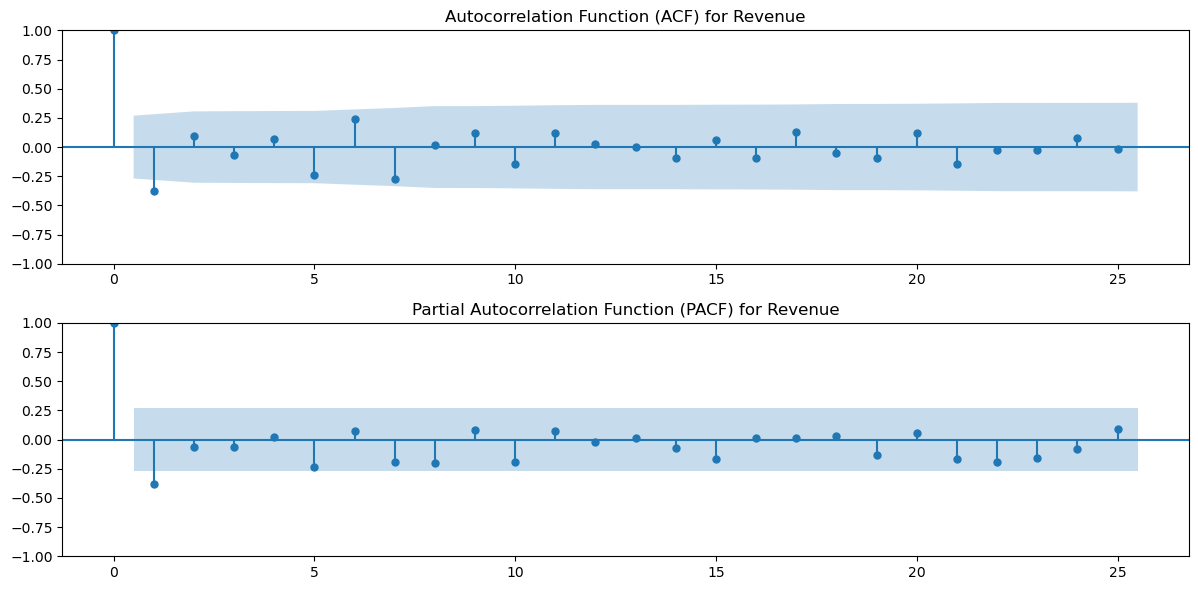

In [5]:
# Plot ACF and PACF for Revenue to determine the maximum lag
plt.figure(figsize=(12, 6))

# Plot ACF and PACF for Revenue to determine the maximum lag
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(weekly_df['Revenue'], lags=25, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Revenue')

plt.subplot(212)
plot_pacf(weekly_df['Revenue'], lags=25, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Revenue')

plt.tight_layout()
plt.show()


In [6]:
# Example data
np.random.seed(42)
X = weekly_df.drop(['META_I','TikTOk_I','Search_I','OLV_I','CTV_I','Display_I','Revenue'],axis=1)
y = weekly_df['Revenue']
X.head()

,Date,META_S,TikTok_S,Search_S,OLV_S,CTV_S,Display_S
0,2024-02-05,24029.980000,0.0,18932.791194,0.0,0.0,0.0
1,2024-02-12,66677.459991,0.0,80068.533750,0.0,0.0,0.0
2,2024-02-19,57408.869990,0.0,66041.936047,0.0,0.0,0.0
3,2024-02-26,56054.549993,0.0,53920.854754,0.0,0.0,0.0
4,2024-03-04,60957.369995,0.0,51343.184922,0.0,0.0,0.0


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras import layers, models


# Define adstock and saturation functions
def adstock(x, alpha, max_lag):
    return np.array([np.sum([alpha ** lag * x[max(i - lag, 0)] for lag in range(max_lag)]) for i in range(len(x))])

def logistic_saturation(x, lam, beta):
    return beta / (1 + np.exp(-lam * x))

# Parameters (use optimal values from Bayesian model or tuned values)
adstock_alpha = 0.5
adstock_max_lag = 10
lam = 1.5
beta = 1.0

# Apply adstock and saturation transformations
transformed_features = []
for channel in spend_cols:
    adstocked = adstock(X[channel].values, adstock_alpha, adstock_max_lag)
    saturated = logistic_saturation(adstocked, lam, beta)
    transformed_features.append(saturated)

transformed_features = np.array(transformed_features).T

# Scale the features
scaler_X = StandardScaler().fit(transformed_features)
X_scaled = scaler_X.transform(transformed_features)

scaler_y = StandardScaler().fit(y.values.reshape(-1, 1))
y_scaled = scaler_y.transform(y.values.reshape(-1, 1)).flatten()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [8]:
import optuna
import numpy as np
from pymc_marketing.mmm.delayed_saturated_mmm import DelayedSaturatedMMM
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation

In [9]:
X.head()

,Date,META_S,TikTok_S,Search_S,OLV_S,CTV_S,Display_S
0,2024-02-05,24029.980000,0.0,18932.791194,0.0,0.0,0.0
1,2024-02-12,66677.459991,0.0,80068.533750,0.0,0.0,0.0
2,2024-02-19,57408.869990,0.0,66041.936047,0.0,0.0,0.0
3,2024-02-26,56054.549993,0.0,53920.854754,0.0,0.0,0.0
4,2024-03-04,60957.369995,0.0,51343.184922,0.0,0.0,0.0


In [10]:
import optuna
import numpy as np

# Define the objective function to minimize divergences
def objective_minimize_divergences(trial):
    # Suggest values for all parameters
    prior_sigma = trial.suggest_float('prior_sigma', 0.1, 10.0)
    mu_values = [trial.suggest_float(f'mu_{ch}', 0.1, 10.0) for ch in spend_cols]
    alpha = trial.suggest_float('alpha', 0.1, 5.0)
    lam_alpha = trial.suggest_float('lam_alpha', 0.1, 10.0)
    lam_beta = trial.suggest_float('lam_beta', 0.1, 10.0)
    likelihood_sigma = trial.suggest_float('likelihood_sigma', 0.1, 10.0)
    gamma_control_mu = trial.suggest_float('gamma_control_mu', -5.0, 5.0)
    gamma_control_sigma = trial.suggest_float('gamma_control_sigma', 0.1, 10.0)
    gamma_fourier_mu = trial.suggest_float('gamma_fourier_mu', -5.0, 5.0)
    gamma_fourier_b = trial.suggest_float('gamma_fourier_b', 0.1, 10.0)
    intercept_tvp_m = trial.suggest_int('intercept_tvp_m', 10, 50)
    intercept_tvp_ls_mu = trial.suggest_float('intercept_tvp_ls_mu', 50, 200)
    intercept_tvp_ls_sigma = trial.suggest_float('intercept_tvp_ls_sigma', 0.1, 5.0)
    intercept_tvp_eta_lam = trial.suggest_float('intercept_tvp_eta_lam', 0.1, 10.0)

    # Define the model config with the suggested parameters
    my_model_config = {
        'intercept': {'dist': 'HalfNormal', 'kwargs': {'sigma': 0.05}},
        'beta_channel': {
            'dist': 'LogNormal',
            "kwargs": {"mu": np.array(mu_values), "sigma": prior_sigma}
        },
        'alpha': {'dist': 'Beta', 'kwargs': {'alpha': alpha, 'beta': 3}},
        'lam': {'dist': 'Gamma', 'kwargs': {'alpha': lam_alpha, 'beta': lam_beta}},
        'likelihood': {'dist': 'Normal', 'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': likelihood_sigma}}}},
        'gamma_control': {'dist': 'Normal', 'kwargs': {'mu': gamma_control_mu, 'sigma': gamma_control_sigma}},
        'gamma_fourier': {'dist': 'Laplace', 'kwargs': {'mu': gamma_fourier_mu, 'b': gamma_fourier_b}},
        'intercept_tvp_kwargs': {
            'm': intercept_tvp_m,
            'L': None,
            'eta_lam': intercept_tvp_eta_lam,
            'ls_mu': intercept_tvp_ls_mu,
            'ls_sigma': intercept_tvp_ls_sigma,
            'cov_func': None
        }
    }

    # Define the model
    ollies_mmm = DelayedSaturatedMMM(
        model_config=my_model_config,
        target_column='Revenue',
        date_column='Date',
        validate_data=True,
        channel_columns=spend_cols,
        adstock_max_lag=10,
        yearly_seasonality=2,
        time_varying_intercept=False
    )

    try:
        # Fit the model on the dataset
        idata = ollies_mmm.fit(X, y, target_accept=0.95, chains=4, random_seed=43)
        # Check for divergences
        divergences = np.array(idata.sample_stats.diverging.values).sum()
        return divergences
    except Exception as e:
        return float('inf')

# Create and run the Optuna study for minimizing divergences
study_divergences = optuna.create_study(direction='minimize')
study_divergences.optimize(objective_minimize_divergences, n_trials=5)



[I 2024-06-22 14:44:05,821] A new study created in memory with name: no-name-6e2aeff8-7583-4fb5-b127-ab09f37076a5
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:518: FutureWarning: All coords are now mutable by default. coords_mutable will be removed in a future release.
  warnings.warn(
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:988: FutureWarning: Coords are now always mutable. Specifying `mutable` will raise an error in a future release
  warnings.warn(
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/data.py:303: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/data.py:303: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampl

Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 266 seconds.
[I 2024-06-22 14:48:58,633] Trial 0 finished with value: 0.0 and parameters: {'prior_sigma': 1.8517114633791614, 'mu_META_S': 8.37216130765381, 'mu_TikTok_S': 6.790583065411483, 'mu_Search_S': 8.158361134319676, 'mu_OLV_S': 5.83878729499591, 'mu_CTV_S': 9.382770239117447, 'mu_Display_S': 7.226980793539492, 'alpha': 2.153601494699733, 'lam_alpha': 2.4316454602092894, 'lam_beta': 8.628016804457683, 'likelihood_sigma': 1.1716801409449955, 'gamma_control_mu': 0.36971514776609427, 'gamma_control_sigma': 3.836625849667411, 'gamma_fourier_mu': 4.490485202490153, 'gamma_fourier_b': 5.889026051642941, 'intercept_tvp_m': 46, 'intercept_tvp_ls_mu': 126.96115327971914, 'intercept_tvp_ls_sigma': 4.564175196606977, 'intercept_tvp_eta_lam': 2.7966769254554005}. Best is trial 0 with value: 0.0.
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:518: Futur

Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 491 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
[I 2024-06-22 14:57:33,779] Trial 1 finished with value: 0.0 and parameters: {'prior_sigma': 5.748366211744308, 'mu_META_S': 9.743188546359443, 'mu_TikTok_S': 5.829366915363767, 'mu_Search_S': 5.712180477955914, 'mu_OLV_S': 2.837370680187662, 'mu_CTV_S': 1.0132038423457106, 'mu_Display_S': 7.752487985624192, 'alpha': 1.7549521613413146, 'lam_alpha': 0.3255654543922648, 'lam_beta': 5.305301780671916, 'likelihood_sigma': 5.913780275535324, 'gamma_contro

Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 163 seconds.
[I 2024-06-22 15:00:41,204] Trial 2 finished with value: 0.0 and parameters: {'prior_sigma': 7.145674799453974, 'mu_META_S': 8.618315982672131, 'mu_TikTok_S': 2.4632914960188526, 'mu_Search_S': 6.218211772734906, 'mu_OLV_S': 5.993681122339447, 'mu_CTV_S': 9.965200296335674, 'mu_Display_S': 2.768146582432794, 'alpha': 4.503473790442133, 'lam_alpha': 8.544166443637842, 'lam_beta': 8.639707109292653, 'likelihood_sigma': 3.171663585294895, 'gamma_control_mu': 4.209398019548608, 'gamma_control_sigma': 9.549430588302744, 'gamma_fourier_mu': 2.580778682198752, 'gamma_fourier_b': 9.08507788214669, 'intercept_tvp_m': 45, 'intercept_tvp_ls_mu': 53.983436484290806, 'intercept_tvp_ls_sigma': 1.6436367595448247, 'intercept_tvp_eta_lam': 8.502529387444913}. Best is trial 0 with value: 0.0.
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:518: FutureWa

Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 163 seconds.
[I 2024-06-22 15:03:49,405] Trial 3 finished with value: 0.0 and parameters: {'prior_sigma': 7.393553379087186, 'mu_META_S': 0.32728017776381524, 'mu_TikTok_S': 5.719476343022817, 'mu_Search_S': 6.2016957421327294, 'mu_OLV_S': 3.066970093615, 'mu_CTV_S': 4.870267992415654, 'mu_Display_S': 4.632041378925072, 'alpha': 3.013737976002903, 'lam_alpha': 6.2777894395983065, 'lam_beta': 5.33716530884064, 'likelihood_sigma': 1.3601632120400244, 'gamma_control_mu': -4.463622307328512, 'gamma_control_sigma': 6.692662565541308, 'gamma_fourier_mu': -2.7455553501652705, 'gamma_fourier_b': 4.699992762725917, 'intercept_tvp_m': 35, 'intercept_tvp_ls_mu': 166.71472617163957, 'intercept_tvp_ls_sigma': 4.791571539091135, 'intercept_tvp_eta_lam': 2.9734367179258605}. Best is trial 0 with value: 0.0.
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:518: Futu

Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 70 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
[I 2024-06-22 15:05:23,514] Trial 4 finished with value: 1.0 and parameters: {'prior_sigma': 3.3424941512861235, 'mu_META_S': 0.4617609419035623, 'mu_TikTok_S': 6.162518827083525, 'mu_Search_S': 2.0011804857034283, 'mu_OLV_S': 0.7485679360946301, 'mu_CTV_S': 5.4657046795251345, 'mu_Display_S': 2.1655355965602014, 'alpha': 2.402570594181033, 'lam_alpha': 9.296489380712625, 'lam_beta': 0.3633311218274847, 'likelihood_sigma': 7.312691057124976, 'gamma_control_mu': -1.15

In [11]:
# Get the best params for minimizing divergences
best_params_divergences_1 = study_divergences.best_params

In [12]:
best_params_divergences_1

{'prior_sigma': 1.8517114633791614,
 'mu_META_S': 8.37216130765381,
 'mu_TikTok_S': 6.790583065411483,
 'mu_Search_S': 8.158361134319676,
 'mu_OLV_S': 5.83878729499591,
 'mu_CTV_S': 9.382770239117447,
 'mu_Display_S': 7.226980793539492,
 'alpha': 2.153601494699733,
 'lam_alpha': 2.4316454602092894,
 'lam_beta': 8.628016804457683,
 'likelihood_sigma': 1.1716801409449955,
 'gamma_control_mu': 0.36971514776609427,
 'gamma_control_sigma': 3.836625849667411,
 'gamma_fourier_mu': 4.490485202490153,
 'gamma_fourier_b': 5.889026051642941,
 'intercept_tvp_m': 46,
 'intercept_tvp_ls_mu': 126.96115327971914,
 'intercept_tvp_ls_sigma': 4.564175196606977,
 'intercept_tvp_eta_lam': 2.7966769254554005}

In [13]:
best_params_divergences = best_params_divergences_1

In [14]:
# Define the model with stock price as a control variable
my_model_config = {
    'intercept': {'dist': 'HalfNormal', 'kwargs': {'sigma': 0.05}},
    'beta_channel': {
        'dist': 'LogNormal',
        "kwargs": {"mu": np.array([best_params_divergences[f'mu_{ch}'] for ch in spend_cols]), "sigma": best_params_divergences['prior_sigma']}
    },
    'alpha': {'dist': 'Beta', 'kwargs': {'alpha': best_params_divergences['alpha'], 'beta': 3}},
    'lam': {'dist': 'Gamma', 'kwargs': {'alpha': best_params_divergences['lam_alpha'], 'beta': best_params_divergences['lam_beta']}},
    'likelihood': {'dist': 'Normal', 'kwargs': {'sigma': {'dist': 'HalfNormal', 'kwargs': {'sigma': best_params_divergences['likelihood_sigma']}}}},
    'gamma_control': {'dist': 'Normal', 'kwargs': {'mu': best_params_divergences['gamma_control_mu'], 'sigma': best_params_divergences['gamma_control_sigma']}},
    'gamma_fourier': {'dist': 'Laplace', 'kwargs': {'mu': best_params_divergences['gamma_fourier_mu'], 'b': best_params_divergences['gamma_fourier_b']}},
    'intercept_tvp_kwargs': {
        'm': best_params_divergences['intercept_tvp_m'],
        'L': None,
        'eta_lam': best_params_divergences['intercept_tvp_eta_lam'],
        'ls_mu': best_params_divergences['intercept_tvp_ls_mu'],
        'ls_sigma': best_params_divergences['intercept_tvp_ls_sigma'],
        'cov_func': None
    }
}

In [15]:
ollies_mmm = DelayedSaturatedMMM(
    model_config=my_model_config,
    target_column='Revenue',
    date_column='Date',
    validate_data=True,
    channel_columns=spend_cols,
    #control_columns=control_columns,
    adstock_max_lag=10,
    yearly_seasonality=2,
    time_varying_intercept=True
)

# Fit the model on the dataset
idata = ollies_mmm.fit(X, y, target_accept=0.95, chains=4, random_seed=43)

/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:518: FutureWarning: All coords are now mutable by default. coords_mutable will be removed in a future release.
  warnings.warn(
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/model/core.py:988: FutureWarning: Coords are now always mutable. Specifying `mutable` will raise an error in a future release
  warnings.warn(
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/data.py:303: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/pymc/data.py:303: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_tim

Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 438 seconds.


In [16]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

In [17]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Assuming idata is the inference data object from PyMC sampling
posterior = idata.posterior

# Extract posterior samples for alpha and lam
alpha_samples = posterior['alpha'].mean(dim=["chain","draw"]).values
lam_samples = posterior['lam'].mean(dim=["chain","draw"]).values

In [18]:
# Calculate decay rates, saturation rates, and half-life
decay_rates = alpha_samples
saturation_rates = lam_samples
half_lives = np.log(2) / np.log(1 / decay_rates)

print(decay_rates)

# Plot the results
channels = ['META', 'TikTok', 'Search', 'OLV', 'CTV', 'Display']

[0.07143725 0.41850973 0.07283913 0.41960193 0.42039868 0.42023272]


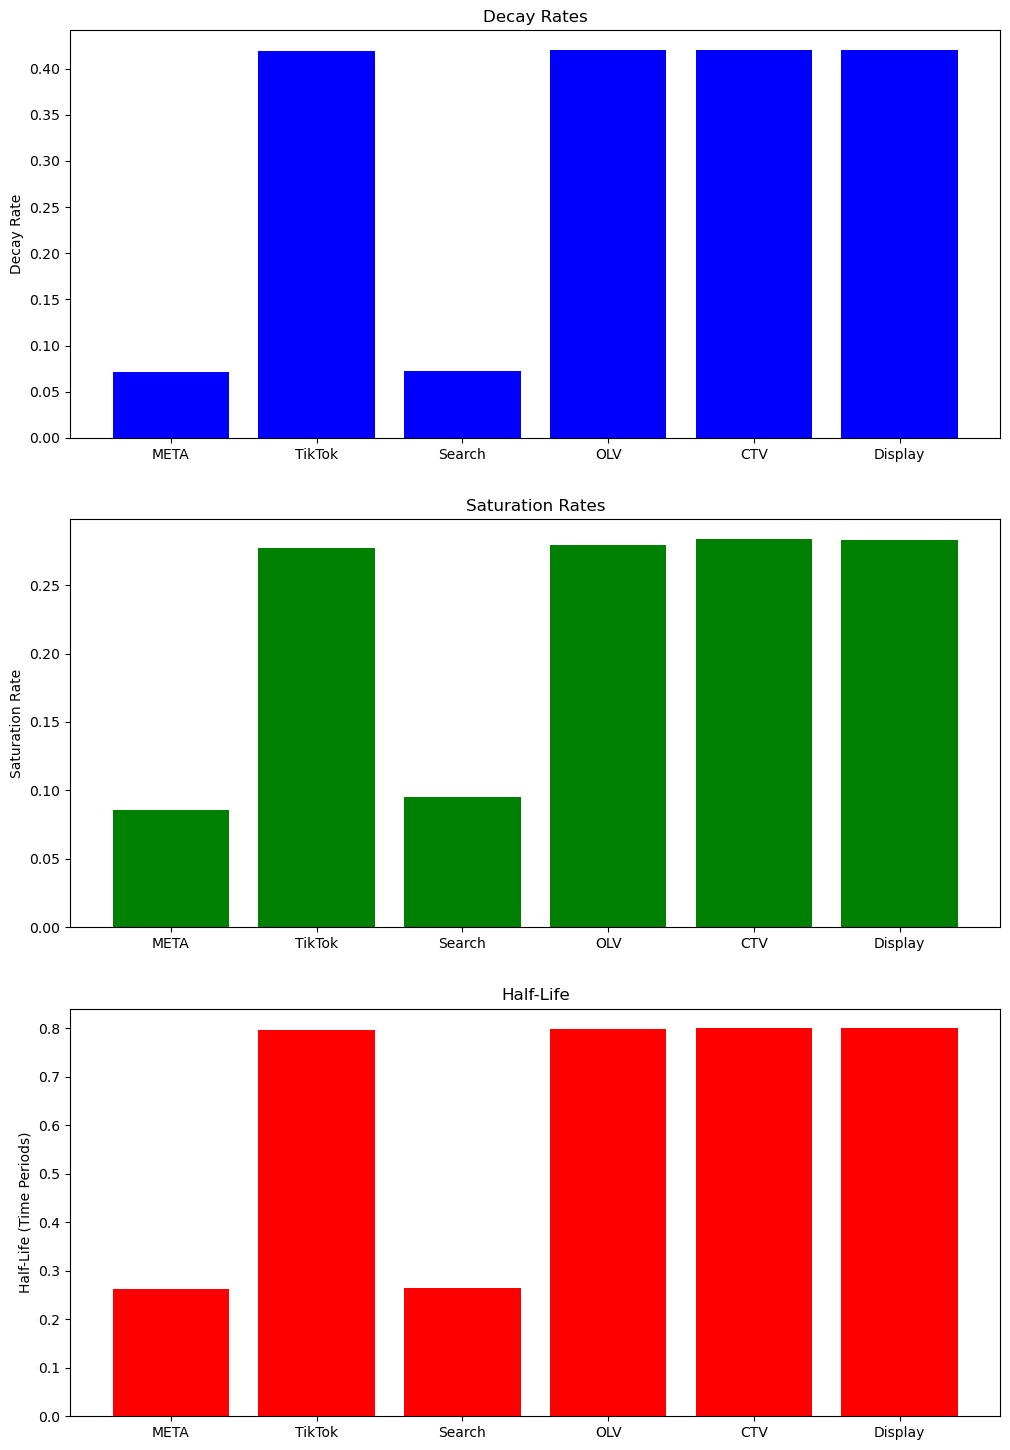

In [19]:

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Decay Rates
axs[0].bar(channels, decay_rates, color='b')
axs[0].set_title('Decay Rates')
axs[0].set_ylabel('Decay Rate')

# Saturation Rates
axs[1].bar(channels, saturation_rates, color='g')
axs[1].set_title('Saturation Rates')
axs[1].set_ylabel('Saturation Rate')

# Half-Life
axs[2].bar(channels, half_lives, color='r')
axs[2].set_title('Half-Life')
axs[2].set_ylabel('Half-Life (Time Periods)')

plt.show()


In [20]:
# Extract the fitted parameters for plotting
best_lam_values = idata.posterior['lam'].mean(dim=["chain", "draw"]).values
best_beta_channel_values = idata.posterior['beta_channel'].mean(dim=["chain", "draw"]).values

In [21]:
from functools import partial

# Define the logistic saturation and saturation functions
def logistic_saturation(x, lam):
    return x / (1 + lam * x)

def saturation_function(x, lam, beta):
    return (beta * logistic_saturation(x, lam))

# Get the spend data (assuming X is the dataframe with spend data for each channel)
spend = X.sum(axis=0,numeric_only=True)

# Define the step size and create the x-axis values
step_size = 0.05
xx = np.arange(0, spend.max() * 1.1, step_size)

# Create the curve functions for each channel
curve_functions = [partial(saturation_function, lam=best_lam_values[i], beta=best_beta_channel_values[i]) for i in range(6)]

# Generate the curves for each channel
curves = [curve_fn(xx) for curve_fn in curve_functions]

In [ ]:
print(curves)

In [ ]:
spend_cols

In [72]:
#from memory_profiler import profile

# Plotting functions
# def plot_actual_curves(ax: plt.Axes, curves, labels, linestyle: str | None = None) -> plt.Axes:
#     for i, curve in enumerate(curves):
#         ax.plot(xx, curve, label=labels[i], linestyle=linestyle)
#     return ax

# def plot_reference(ax: plt.Axes) -> plt.Axes:
#     ax.plot(xx, xx, label="y=x", color="black", linestyle="--")
#     return ax

# # Labels for the media channels
# labels = ['META', 'TikTok', 'Search', 'OLV', 'CTV', 'Display']

# #@profile
# def plot_curves():
#     print(f"Plotting curve {i+1} with label {labels[i]}")  # Debug statement

#     fig, ax = plt.subplots(figsize=(12, 8))
#     plot_actual_curves(ax, curves, labels)
#     plot_reference(ax)
#     ax.set(
#         xlabel="Channel Spend",
#         ylabel="Channel Contribution",
#         title="Actual Saturation Curves (Unobserved)"
#     )
#     ax.legend()
#     plt.show()

# plot_curves()

In [27]:
media_spends = X.sum(axis=0,numeric_only=True)
media_spends

META_S       2.945327e+06
TikTok_S     0.000000e+00
Search_S     3.157461e+06
OLV_S        0.000000e+00
CTV_S        0.000000e+00
Display_S    0.000000e+00
dtype: float64

/var/folders/__/qxp2lqfx6w9_fbpbybfth3b40000gn/T/ipykernel_36363/1931111260.py:10: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_spends = X.sum(axis=0)  # Total spend per channel


Share of Spend: META_S       0.490112
TikTok_S     0.000000
Search_S     0.509888
OLV_S        0.000000
CTV_S        0.000000
Display_S    0.000000
dtype: float64
Share of Effect: [0.44956148 0.         0.55043852 0.         0.         0.        ]
ROI: META_S       1.009843e-07
TikTok_S              NaN
Search_S     1.188486e-07
OLV_S                 NaN
CTV_S                 NaN
Display_S             NaN
dtype: float64


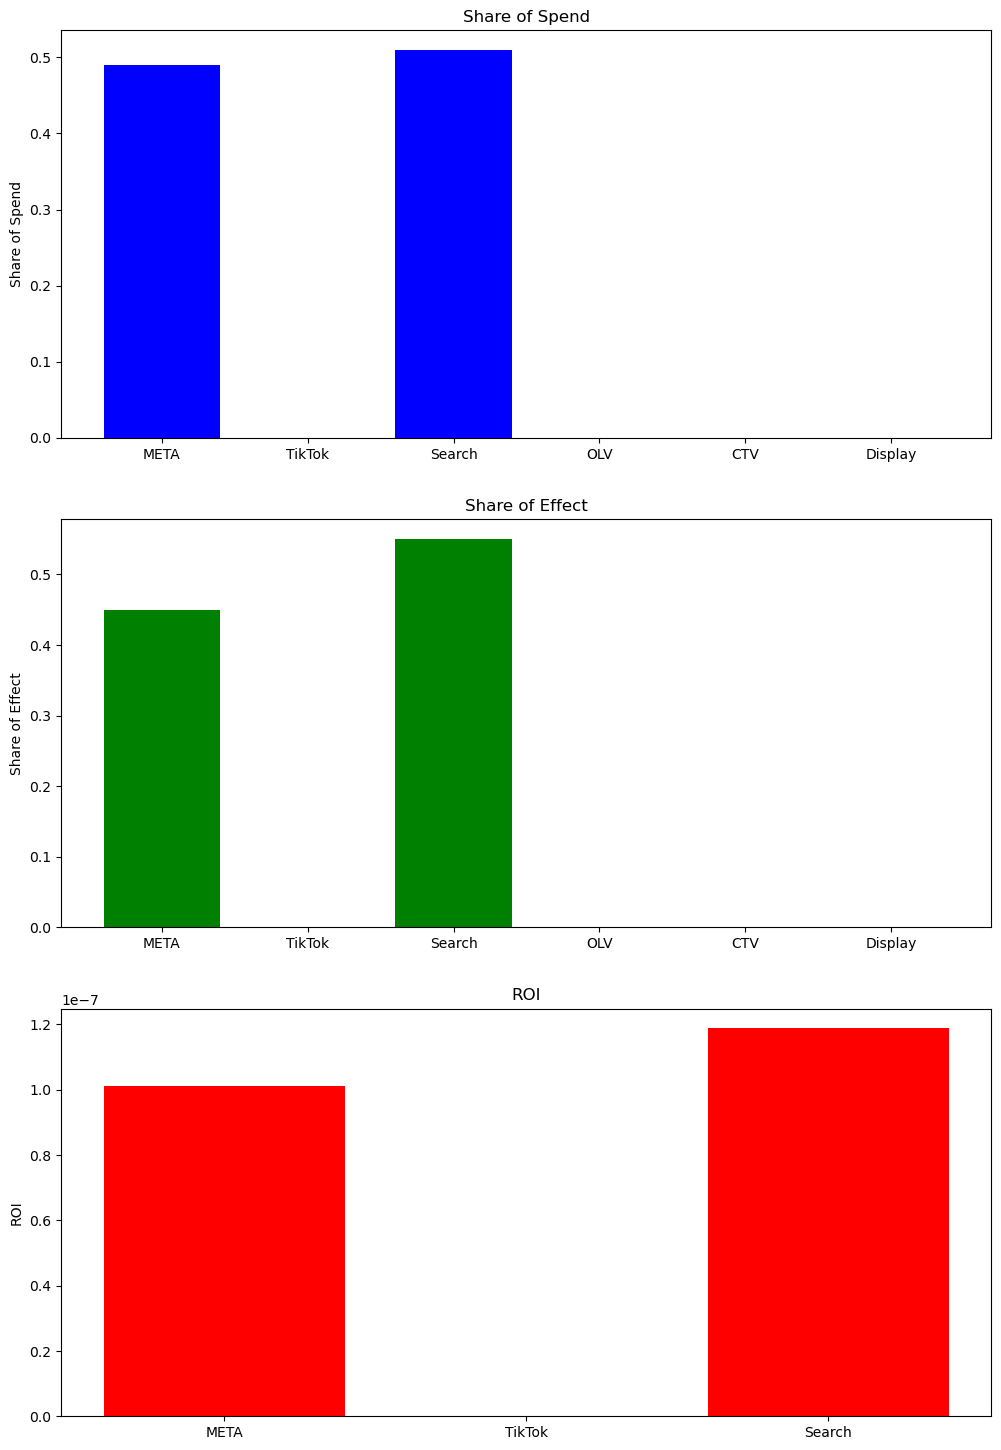

In [23]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt


###########################
##############################
################################
# Extract media spend and incremental sales from the Bayesian model inference data
media_spends = X.sum(axis=0)  # Total spend per channel
incremental_sales = idata.posterior['channel_contributions'].mean(dim=['chain', 'draw']).values.mean(axis=0)

# Calculate total spend and total incremental sales
total_spend = media_spends.sum()
total_incremental_sales = incremental_sales.sum()

# Calculate Share of Spend and Share of Effect
share_of_spend = media_spends / total_spend
share_of_effect = incremental_sales / total_incremental_sales

# Calculate ROI for each channel
roi = incremental_sales / media_spends

# Print the calculated values
print("Share of Spend:", share_of_spend)
print("Share of Effect:", share_of_effect)
print("ROI:", roi)

# Plot the results
channels = ['META', 'TikTok', 'Search', 'OLV', 'CTV', 'Display']

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Share of Spend
axs[0].bar(channels, share_of_spend, color='b')
axs[0].set_title('Share of Spend')
axs[0].set_ylabel('Share of Spend')

# Share of Effect
axs[1].bar(channels, share_of_effect, color='g')
axs[1].set_title('Share of Effect')
axs[1].set_ylabel('Share of Effect')

# ROI
axs[2].bar(channels, roi, color='r')
axs[2].set_title('ROI')
axs[2].set_ylabel('ROI')

plt.show()


In [40]:
idata.posterior

<xarray.Dataset> Size: 45MB
Dimensions:                                       (chain: 4, draw: 1000,
                                                   channel: 6, date: 53,
                                                   fourier_mode: 4, m: 49)
Coordinates:
  * chain                                         (chain) int64 32B 0 1 2 3
  * draw                                          (draw) int64 8kB 0 1 ... 999
  * channel                                       (channel) <U9 216B 'META_S'...
  * date                                          (date) datetime64[ns] 424B ...
  * fourier_mode                                  (fourier_mode) <U11 176B 's...
  * m                                             (m) int64 392B 0 1 2 ... 47 48
Data variables: (12/16)
    alpha                                         (chain, draw, channel) float64 192kB ...
    beta_channel                                  (chain, draw, channel) float64 192kB ...
    channel_adstock                               (chain, draw, date, channel) float64 10MB ...
    channel_adstock_saturated                     (chain, draw, date, channel) float64 10MB ...
    channel_contributions                         (chain, draw, date, channel) float64 10MB ...
    fourier_contributions                         (chain, draw, date, fourier_mode) float64 7MB ...
    ...                                            ...
    intercept_time_varying_multiplier_eta         (chain, draw) float64 32kB ...
    intercept_time_varying_multiplier_hsgp_coefs  (chain, draw, m) float64 2MB ...
    intercept_time_varying_multiplier_ls          (chain, draw) float64 32kB ...
    lam                                           (chain, draw, channel) float64 192kB ...
    likelihood_sigma                              (chain, draw) float64 32kB ...
    mu                                            (chain, draw, date) float64 2MB ...
Attributes:
    created_at:                 2024-06-20T08:24:25.970757+00:00
    arviz_version:              0.18.0
    inference_library:          pymc
    inference_library_version:  5.15.0
    sampling_time:              142.9300217628479
    tuning_steps:               1000

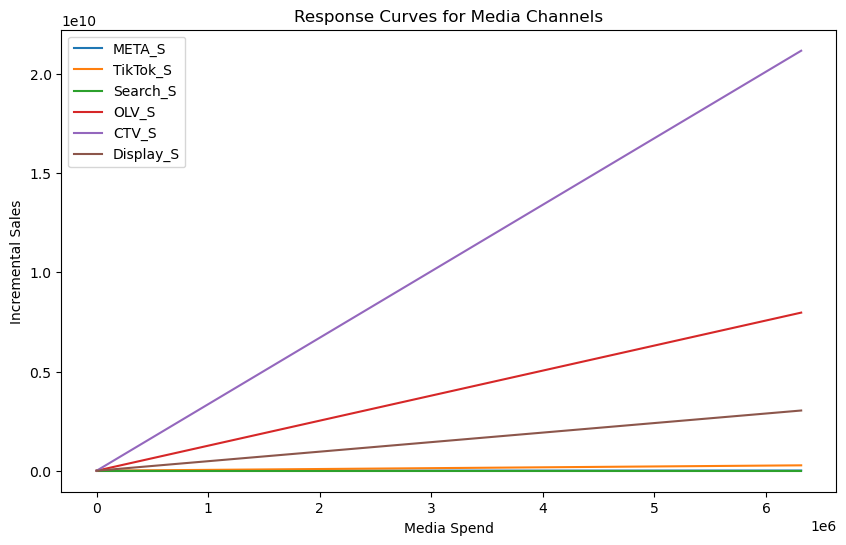

In [43]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Define spend levels for simulation
spend_levels = np.linspace(0, media_spends.max() * 2, 100)

# Initialize response curves list
response_curves = []

# Calculate response for each channel
for channel in spend_cols:
    alpha = idata.posterior['alpha'].mean(dim=['chain', 'draw']).sel(channel=channel).values
    beta_channel = idata.posterior['beta_channel'].mean(dim=['chain', 'draw']).sel(channel=channel).values
    lam = idata.posterior['lam'].mean(dim=['chain', 'draw']).sel(channel=channel).values

    responses = alpha + beta_channel * spend_levels * (1 - np.exp(-lam * spend_levels))
    #responses = alpha + beta_channel * spend * (1 - np.exp(-lam * spend))
    response_curves.append(responses)

# Plot response curves
fig, ax = plt.subplots(figsize=(10, 6))
for i, channel in enumerate(spend_cols):
    ax.plot(spend_levels, response_curves[i], label=channel)

ax.set_xlabel('Media Spend')
ax.set_ylabel('Incremental Sales')
ax.legend()
plt.title('Response Curves for Media Channels')
plt.show()


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid function for logistic saturation

def adstock(x, alpha):
    y = np.zeros_like(x)
    for i in range(1, len(x)):
        y[i] = x[i] + alpha * y[i - 1]
    return y

def saturation_function(x, lam, beta):
    return beta / (1 + np.exp(-lam * x))

def plot_response_curve_fit_bayesian(
    idata,  # The inference data object from the fitted Bayesian model
    channel: str,
    color_index: int,
    xlim_max: int | None,
    label: str = "Fit Curve",
    quantile_lower: float = 0.05,
    quantile_upper: float = 0.95,
    ax: plt.Axes = None
) -> None:
    """
    Plot the curve fit for the given channel based on the estimation of the parameters by the Bayesian model.

    Parameters
    ----------
    idata : arviz.InferenceData
        The inference data object from the fitted Bayesian model.
    channel : str
        The name of the channel for which the curve fit is being plotted.
    color_index : int
        An index used for color selection to ensure distinct colors for multiple plots.
    xlim_max: int
        The maximum value to be plot on the X-axis.
    label: str
        The label for the curve being plotted, default is "Fit Curve".
    quantile_lower: float
        The lower quantile for parameter estimation, default is 0.05.
    quantile_upper: float
        The upper quantile for parameter estimation, default is 0.95.
    ax : plt.Axes
        The matplotlib axes object where the plot should be drawn. If None, creates a new plot.

    Returns
    -------
    None
        The function modifies the given axes object in-place and doesn't return any object.
    """

    if ax is None:
        ax = plt.gca()

    # Extract parameters from the inference data object
    alpha = idata.posterior['alpha'].mean(dim=['chain', 'draw']).sel(channel=channel).values
    lam = idata.posterior['lam'].mean(dim=['chain', 'draw']).sel(channel=channel).values
    beta = idata.posterior['beta_channel'].mean(dim=['chain', 'draw']).sel(channel=channel).values

    # Determine x_limit
    if xlim_max is not None:
        x_limit = xlim_max
    else:
        x_limit = 100  # Default limit, can be adjusted based on data

    # Generate x_fit
    x_fit = np.linspace(0, x_limit, 1000)

    # Apply adstock transformation
    adstocked_x_fit = adstock(x_fit, alpha)

    # Calculate y_fit, y_fit_lower, y_fit_upper using the adstocked spend data
    y_fit = saturation_function(adstocked_x_fit, lam, beta)

    y_fit_lower = saturation_function(
        adstock(adstocked_x_fit, np.quantile(idata.posterior['alpha'].sel(channel=channel), quantile_lower, axis=(0, 1))),
        np.quantile(idata.posterior['lam'].sel(channel=channel), quantile_lower, axis=(0, 1)),
        np.quantile(idata.posterior['beta_channel'].sel(channel=channel), quantile_lower, axis=(0, 1))
    )

    y_fit_upper = saturation_function(
        adstock(adstocked_x_fit, np.quantile(idata.posterior['alpha'].sel(channel=channel), quantile_upper, axis=(0, 1))),
        np.quantile(idata.posterior['lam'].sel(channel=channel), quantile_upper, axis=(0, 1)),
        np.quantile(idata.posterior['beta_channel'].sel(channel=channel), quantile_upper, axis=(0, 1))
    )

    # Plotting
    ax.fill_between(x_fit, y_fit_lower, y_fit_upper, color=f"C{color_index}", alpha=0.25)
    ax.plot(x_fit, y_fit, color=f"C{color_index}", label=label, alpha=0.6)

    ax.set(xlabel="Spent", ylabel="Contribution")
    ax.legend()


In [36]:
X['META_S'].min()

24029.98

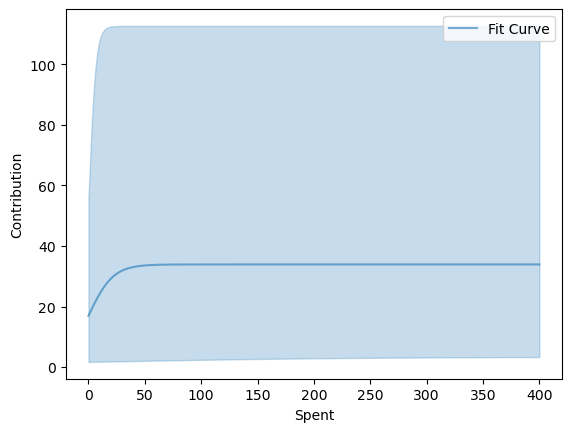

In [38]:
plot_response_curve_fit_bayesian(idata, channel='META_S', color_index=0, xlim_max=400)


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import arviz as az

# Define adstock and saturation functions
def adstock(x, alpha):
    y = np.zeros_like(x)
    for i in range(1, len(x)):
        y[i] = x[i] + alpha * y[i - 1]
    return y

def saturation_function(x, lam, beta):
    return beta / (1 + np.exp(-lam * x))

# Extract parameters from the inference data object
def get_params(idata, channel):
    alpha = idata.posterior['alpha'].mean(dim=['chain', 'draw']).sel(channel=channel).values
    lam = idata.posterior['lam'].mean(dim=['chain', 'draw']).sel(channel=channel).values
    beta = idata.posterior['beta_channel'].mean(dim=['chain', 'draw']).sel(channel=channel).values
    return alpha, lam, beta

In [40]:

# Create spend dictionary from dataframe
spend = {col: X[col].values for col in X.columns}

In [41]:

# Extract parameters for each channel
channels = ['META_S', 'TikTok_S', 'Search_S', 'OLV_S', 'CTV_S', 'Display_S']
params = {channel: get_params(idata, channel) for channel in channels}

/Users/sangeetadutta/PycharmProjects/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


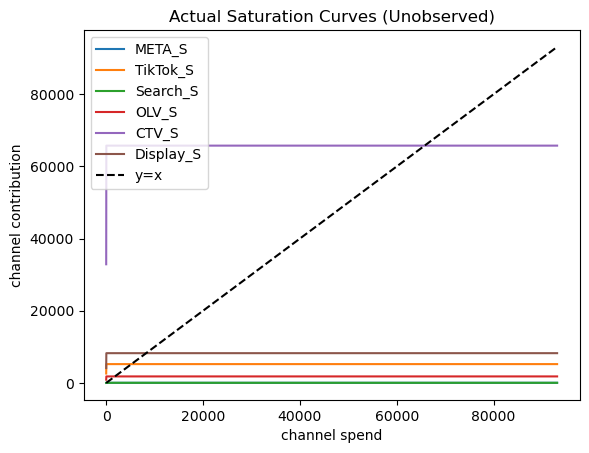

In [42]:
# Step size and x range for curves
step_size = 0.05
xx = np.arange(0, max(max(spend[channel]) for channel in channels) * 1.1, step_size)

# Define curve functions and apply adstock transformation for each channel
curves = {}
for channel in channels:
    alpha, lam, beta = params[channel]
    adstocked_xx = adstock(xx, alpha)
    curve_fn = partial(saturation_function, lam=lam, beta=beta)
    curves[channel] = curve_fn(adstocked_xx)

# Plot functions
def plot_actual_curves(ax: plt.Axes, linestyle: str | None = None) -> plt.Axes:
    for i, (channel, curve) in enumerate(curves.items()):
        ax.plot(xx, curve, label=channel, color=f"C{i}", linestyle=linestyle)
    return ax

def plot_reference(ax: plt.Axes) -> plt.Axes:
    ax.plot(xx, xx, label="y=x", color="black", linestyle="--")
    return ax

ax = plt.gca()
plot_actual_curves(ax)
plot_reference(ax)
ax.set(
    xlabel="channel spend",
    ylabel="channel contribution",
    title="Actual Saturation Curves (Unobserved)",
)
ax.legend()
plt.show()


In [37]:
# Apply adstock and saturation transformations
# transformed_features = []
# for i, channel in enumerate(spend_cols):
#     adstocked = adstock(X[channel].values, adstock_alpha, adstock_max_lag)
#     mu_channel = best_params_divergences[f'mu_{channel}' ]
#     sigma_channel = best_params_divergences['prior_sigma']
#     beta_channel = np.random.lognormal(mean=mu_channel, sigma=sigma_channel)
#     saturated = logistic_saturation(adstocked, lam, beta_channel)
#     transformed_features.append(saturated)

# transformed_features = np.array(transformed_features).T

# # Scale the features
# scaler_X = StandardScaler().fit(transformed_features)
# X_scaled = scaler_X.transform(transformed_features)

# scaler_y = StandardScaler().fit(y.values.reshape(-1, 1))
# y_scaled = scaler_y.transform(y.values.reshape(-1, 1)).flatten()

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# # Build the multi-stage neural network
# input_layer = layers.Input(shape=(X_train.shape[1],))

# # Stage 1: Awareness
# stage1 = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
# stage1 = layers.Dropout(0.3)(stage1)

# # Stage 2: Interest
# stage2 = layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(stage1)
# stage2 = layers.Dropout(0.3)(stage2)

# # Stage 3: Decision
# stage3 = layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(stage2)
# stage3 = layers.Dropout(0.3)(stage3)

# # Stage 4: Action
# output_layer = layers.Dense(1)(stage3)

# model = models.Model(inputs=input_layer, outputs=output_layer)

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=16, verbose=1)

# # Evaluate the model
# loss, mae = model.evaluate(X_test, y_test, verbose=1)
# print(f"Test MAE: {mae}")

# # Make predictions
# y_pred = model.predict(X_test)
# y_pred_rescaled = scaler_y.inverse_transform(y_pred)
# y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# # Calculate R-squared value
# r2 = r2_score(y_test_rescaled, y_pred_rescaled)
# print(f"R-squared: {r2}")

# # Compare predictions to actual values
# results = pd.DataFrame({'Actual': y_test_rescaled.flatten(), 'Predicted': y_pred_rescaled.flatten()})
# print(results.head())

# # Plot predictions vs actual values
# plt.scatter(y_test_rescaled, y_pred_rescaled)
# plt.xlabel('Actual Revenue')
# plt.ylabel('Predicted Revenue')
# plt.title('Predicted vs Actual Revenue')
# plt.show()
